<a href="https://colab.research.google.com/github/henterm/linked-blog-starter-md/blob/main/Exam_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

 Методами машинного обучения (не статистическими тестами) показать, что разбиение на трейн и тест репрезентативно.


###**Ответ:**

Проверка репрезентативности разбиения на тренировочную (train) и тестовую (test) выборки в машинном обучении важна для уверенности в том, что модель будет корректно работать на новых данных. Ниже приведены несколько методов машинного обучения, которые можно использовать для проверки репрезентативности разбиения:

1.   Обучение модели на тренировочных данных и оценка на тестовых данных:


*   Обучение модели на тренировочных данных.
*   Оценка её качества на тестовых данных.
*   Сравнение метрики качества модели на тренировочных и тестовых данных. Если они близки, разбиение можно считать репрезентативным.


2.   Кросс-валидация:

*   Используем k-фолдовую кросс-валидацию, чтобы проверить стабильность модели на различных разбиениях данных.
*   Если результаты кросс-валидации схожи с результатами на тестовых данных, разбиение можно считать репрезентативным.


3.   Сравнение распределений признаков:


*   Сравнение распределения признаков в тренировочных и тестовых данных.
*   Для этого можно использовать такие методы, как построение гистограмм и применение алгоритмов плотности, например, Kernel Density Estimation (KDE).
*   Если распределения совпадают или близки, это говорит о репрезентативности разбиения.


4.   Обнаружение аномалий:



*   Использование алгоритмов обнаружения аномалий, такие как Isolation Forest или One-Class SVM, чтобы выявить возможные выбросы или аномальные данные в тестовой выборке по сравнению с тренировочной.
*   Если аномалий не обнаружено, это говорит о том, что разбиение данных репрезентативно.

Некоторый пример на Python:

Train Accuracy: 0.5357142857142857
Test Accuracy: 0.45666666666666667
Cross-Validation Scores: [0.535 0.535 0.5   0.45  0.505]


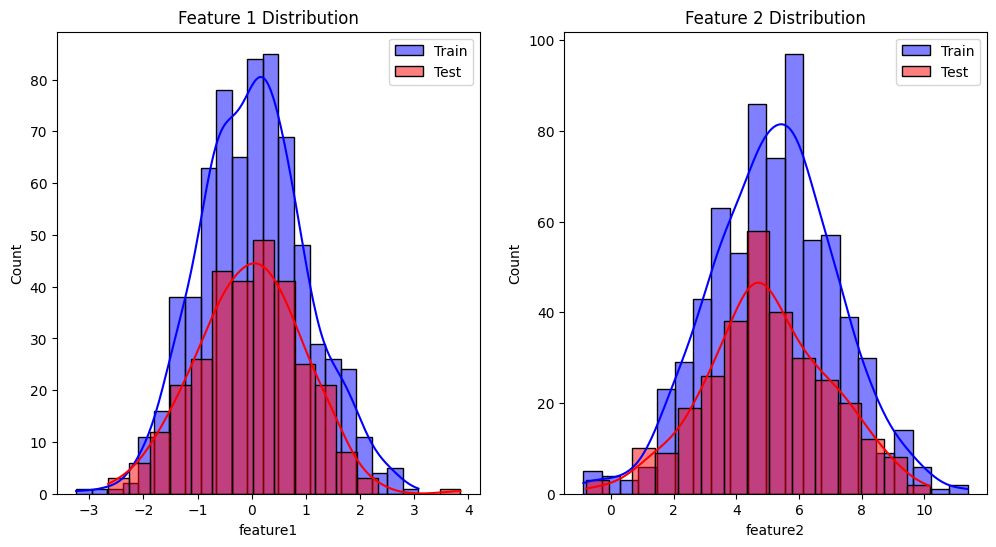

Anomaly Scores: [ 0.1391032   0.08294002  0.02384224  0.10375734  0.09475197  0.09241331
  0.08791626 -0.00837138  0.1406021   0.10760316  0.1607742   0.06703435
  0.11021138  0.14948119  0.12773819  0.13094546  0.15881625  0.09684579
  0.13934596  0.15067989  0.10453914  0.13524716  0.05379378  0.07127428
  0.08662562  0.06145264 -0.09608521  0.07263768  0.11634933  0.14418336
 -0.10272     0.08388218  0.07787869  0.08606413  0.15532775  0.15644161
  0.15180479  0.153899    0.14175604  0.1067169   0.08769449  0.15994834
  0.06216545  0.15545151  0.14554999  0.14504739 -0.02960901  0.06726065
  0.13772997  0.11864692  0.13912138  0.08043836  0.15698518  0.04430646
 -0.02684428  0.13996398  0.1236415   0.10895212  0.01150516  0.14605426
  0.10142376  0.09297084  0.06119968 -0.12374158  0.12756113  0.09428193
 -0.01495639  0.12997527  0.15413872  0.05012351  0.11168048  0.13801949
  0.10492828  0.08654244  0.14662525 -0.02788436  0.14970945  0.13039469
  0.1346623   0.14516788  0.0671587

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация случайных данных для примера
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(5, 2, 1000),
    'label': np.random.randint(0, 2, 1000)
})

# Разбиение данных на трейн и тест
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 1. Обучение модели на тренировочных данных и оценка на тестовых данных
model = LogisticRegression()
model.fit(train_data[['feature1', 'feature2']], train_data['label'])
train_score = model.score(train_data[['feature1', 'feature2']], train_data['label'])
test_score = model.score(test_data[['feature1', 'feature2']], test_data['label'])

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

# 2. Кросс-валидация
cross_val_scores = cross_val_score(model, data[['feature1', 'feature2']], data['label'], cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")

# 3. Сравнение распределений признаков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['feature1'], color='blue', kde=True, label='Train')
sns.histplot(test_data['feature1'], color='red', kde=True, label='Test')
plt.title('Feature 1 Distribution')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(train_data['feature2'], color='blue', kde=True, label='Train')
sns.histplot(test_data['feature2'], color='red', kde=True, label='Test')
plt.title('Feature 2 Distribution')
plt.legend()

plt.show()

# 4. Обнаружение аномалий
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(train_data[['feature1', 'feature2']])
anomaly_scores = iso_forest.decision_function(test_data[['feature1', 'feature2']])
print(f"Anomaly Scores: {anomaly_scores}")


Как видно в данном случае, разбиение репрезентативно

#Задание 3

Что лучше 2 модели случайного леса по 500 деревьев или одна на 1000, при условии, что ВСЕ параметры кроме количества деревьев одинаковы?

###**Ответ:**

Если параметры моделей идентичны, за исключением количества деревьев, то с точки зрения качества предсказаний, одна модель с 1000 деревьями будет лучше, чем две модели по 500 деревьев, при условии, что мы усредняем результаты без дополнительного контроля (например, фиксирования random_state). Причины этого следующие:


1.   **Улучшение стабильности модели:** С увеличением числа деревьев, ансамблевая модель (случайный лес) будет более устойчивой и менее подверженной случайным отклонениям, возникающим из-за разбиения данных на подмножества. Если все деревья обучаются в одной модели, они могут лучше улавливать закономерности и снижать дисперсию.
2.   **Случайность и разнообразие:** Если обучать две модели по 500 деревьев, и при этом не фиксировать random_state, результаты предсказаний двух моделей будут различаться из-за случайности построения деревьев (выбор случайных признаков и подмножества данных). Совокупная ошибка двух моделей будет примерно эквивалентна одной модели с 1000 деревьев. Однако, в большинстве случаев такая процедура не даст значительных улучшений в сравнении с одной большой моделью.
3.   **Фиксированный random_state:** Если вы фиксируете random_state для обеих моделей, то каждая из них будет строить деревья одинаково. Следовательно, усреднение результатов двух моделей по 500 деревьев не даст улучшений по сравнению с одной моделью на 1000 деревьев, так как фактически это будет дублирование части деревьев. В этом случае, одна модель с 1000 деревьев будет предпочтительнее.





#Задание 2

 Есть кластеризованный датасет на 4 кластера (1, 2, 3, 4). Бизнес аналитики посчитали, что самым прибыльным является кластер 2. Каждый клиент представлен в виде 10-тимертного вектора, где первые 6 значений транзакции, а оставшиеся: возраст, пол, социальный статус (женат (замужем)/неженат (не замужем)), количество детей. Нужно поставить задачу оптимизации для каждого клиента не из кластера 2 так, чтобы увидеть как должен начать вести себя клиент, чтобы перейти в кластер 2.


###**Ответ:**

# Постановка задачи

Для того чтобы определить, какие изменения в поведении клиента (на уровне признаков) могут привести к переходу в кластер 2, можно сформулировать задачу оптимизации следующим образом:

### Обозначения:
- $\(x \in \mathbb{R}^{10}\)$ — текущий вектор клиента.
- $\(x' \in \mathbb{R}^{10}\)$ — изменённый вектор клиента (цель оптимизации).
- $\(d(x, x')\)$ — мера изменения между текущим и изменённым векторами.
- $\(C(x')\)$ — функция, возвращающая кластер, к которому относится клиент с вектором $\(x'\)$.

### Цель:
Найти минимальное изменение $\(x \to x'\)$, чтобы клиент был классифицирован в кластер 2:
$\[
\min_{x'} d(x, x') \quad \text{при условии } C(x') = 2
\]$

### Мера изменения $\(d(x, x')\)$:
В качестве меры изменения можно использовать:
- Евклидову норму: $\(\|x - x'\|_2\)$,
- Манхэттенскую норму: $\(\|x - x'\|_1\)$,
- Другую подходящую метрику.

### Ограничения:
1. Для категориальных признаков (пол, социальный статус) изменения возможны только между ограниченным числом значений.
2. Количество детей — целочисленный признак, не может быть дробным.
3. Возраст должен быть в допустимых границах (например, $\( > 0 \)$).

---

# План решения

### Построение модели классификации:
Обучить модель $\(C(x)\)$, которая предсказывает кластер по входным данным $\(x\)$. Это может быть логистическая регрессия, SVM, нейронная сеть или другая подходящая модель.

### Задача оптимизации:
После обучения модели $\(C(x)\)$, решить задачу оптимизации:
$\[
\min_{x'} \|x - x'\|_2^2 + \lambda \cdot L(C(x'), 2)
\]$
где $\(L(C(x'), 2)\)$ — штраф за то, что $\(x'\)$ не попал в кластер 2.

Пример штрафной функции:
$\[
L(C(x'), 2) = -\log P(C(x') = 2)
\]
где \(P(C(x') = 2)\)$ — вероятность принадлежности к кластеру 2.

---

### Учет категориальных признаков:
- Для категориальных признаков можно зафиксировать дискретные значения в процессе оптимизации.
- Например, использовать метод проектирования на допустимые множества (projection).

---

### Решение задачи:
Использовать методы оптимизации, такие как:
1. **Градиентный спуск** — для непрерывных признаков.
2. **Методы смешанных переменных** — для совместной оптимизации дискретных и непрерывных признаков.


### Анализ изменений
После оптимизации можно оценить, какие признаки необходимо изменить для перехода в кластер 2:
1. **Увеличить/уменьшить транзакции**.
2. **Изменить возраст или семейное положение**.


Данный подход позволяет определить минимальные изменения вектора клиента, чтобы он был классифицирован в прибыльный кластер. Оптимизация может быть усложнена с учетом категориальных признаков, а также при использовании более сложных моделей для $/C(x)/$.


#Задание 4

В наличии датасет с данными по дефолту клиентов. Как, имея в инструментарии только алгоритм kmeans получить вероятность дефолта нового клиента.

###**Ответ:**

# Определение вероятности дефолта нового клиента с использованием k-means

## 1. Кластеризация существующих данных
Проведем кластеризацию всех клиентов, используя алгоритм **k-means**.  
Пусть \( k \) — количество кластеров.  
Входные данные: признаки клиентов (без метки "дефолт/не дефолт").

После кластеризации каждому клиенту будет сопоставлен кластер $\( C_i \) (\( i \in \{1, 2, \dots, k\} \)$).

---

## 2. Анализ дефолта в кластерах
Рассчитаем долю клиентов с дефолтом в каждом кластере:
$\[
P(\text{дефолт} | C_i) = \frac{\text{число дефолтных клиентов в } C_i}{\text{общее число клиентов в } C_i}
\]$

Эта доля интерпретируется как вероятность дефолта для клиентов данного кластера.  

Сохраним вероятности для каждого кластера:
$\[
\{P(\text{дефолт} | C_1), P(\text{дефолт} | C_2), \dots, P(\text{дефолт} | C_k)\}
\]$

---

## 3. Прогноз для нового клиента
Для нового клиента вычислим расстояние до центров всех кластеров $\( \mu_1, \mu_2, \dots, \mu_k \)$, используя выбранную метрику, например, евклидово расстояние:
$\[
\text{dist}(x, \mu_i)
\]$
где $\( x \)$ — вектор признаков нового клиента.

Определим ближайший кластер $\( C_j \)$ (тот, к которому ближе всего новый клиент).  

Присвоим вероятность дефолта нового клиента как:
$\[
P(\text{дефолт} | x) = P(\text{дефолт} | C_j)
\]$

---

## 4. Улучшения (по возможности)
- **Взвешенная вероятность:** Если клиент близок сразу к нескольким кластерам, можно учесть вклад всех $\( k \)$ кластеров, взвесив их вероятности дефолта:
$\[
P(\text{дефолт} | x) = \sum_{i=1}^k w_i \cdot P(\text{дефолт} | C_i)
\]$
где $\( w_i = \frac{1}{\text{dist}(x, \mu_i)} \)$ — вес, обратно пропорциональный расстоянию до кластера.

- **Оптимизация $\( k \):$** Подберем оптимальное количество кластеров $\( k \)$, используя метод локтя (elbow method) или силуэтный анализ.

---

## Ограничения подхода:
1. Границы кластеров могут быть жесткими, что приводит к снижению точности.
2. Алгоритм $\( k \)$-means не учитывает целевую метку "дефолт/не дефолт" при формировании кластеров.
3. В случае неоднородности кластеров (разных размеров) метод может переоценивать или недооценивать вероятность дефолта.

Этот метод является эвристическим и подходит для использования в условиях отсутствия более сложных алгоритмов или моделей.


#Задание 5

Есть выборка клиентов с заявкой на кредитный продукт. Датасет состоит из персональных данных: возраст, пол и т.д. Необходимо предсказывать доход клиента, который представляет собой непрерывные данные, но сделать это нужно используя только модель классификации.


###**Ответ:**

Если необходимо предсказывать доход клиента, который является непрерывной переменной, с использованием только модели классификации, задача решается следующим образом:

1. **Дискретизация дохода**  
Поскольку модель классификации работает с категориями, преобразуем непрерывные значения дохода в интервалы. Для этого весь диапазон доходов делится на несколько категорий (например, от 0 до 20,000, от 20,000 до 40,000 и так далее). Каждому интервалу присваивается уникальный класс (например, 0, 1, 2, ...). Этот процесс называется дискретизацией.  

Методы разбиения:  
- *Равномерное разбиение (equal-width):* Диапазон доходов делится на равные интервалы.  
- *Равномерное распределение (equal-frequency):* Каждый интервал содержит приблизительно одинаковое количество клиентов.  
- *Кастомное разбиение:* Интервалы создаются на основе бизнес-логики.  

2. **Обучение модели классификации**  
После дискретизации обучаем модель классификации на преобразованных данных. Входные данные (возраст, пол, уровень образования и т. д.) используются как признаки, а дискретизированный доход — как целевая переменная.  

3. **Прогноз для нового клиента**  
Когда модель классификации предсказывает класс дохода для нового клиента, результат интерпретируется как принадлежность клиента к одному из заранее определённых интервалов дохода.  
Например:  
- Если предсказанный класс — 1, то доход клиента попадает в диапазон [20,000, 40,000).  

4. **Обратное преобразование**  
После предсказания класса дохода, можно интерпретировать результат в виде:  
- Среднего значения дохода в предсказанном интервале.  
- Нижней или верхней границы предсказанного интервала.  

Например, если модель предсказывает, что клиент принадлежит к классу 2 (диапазон [40,000, 60,000), можно считать, что его доход равен среднему значению 50,000.  

5. **Оценка качества**  
Для оценки точности предсказания сравниваем истинные значения дохода с преобразованными значениями (например, средними значениями интервалов предсказанных классов). Метрики, такие как среднеквадратичная ошибка (MSE), помогут измерить, насколько точно модель оценивает доход.  

6. **Улучшения подхода**  
- *Количество интервалов:* Подбирается таким образом, чтобы сохранить баланс между точностью (меньше интервалов — больше обобщение) и сложностью модели (больше интервалов — меньше данных на класс).  
- *Взвешенные вероятности:* Если клиент близок к границам нескольких интервалов, можно учитывать вероятности его принадлежности к разным классам.  

### Ограничения подхода:
- Потеря точности из-за дискретизации, так как непрерывная переменная заменяется на интервалы.  
- Результаты зависят от качества разбиения на интервалы. Неправильный выбор интервалов может привести к низкой точности модели.  
- Модель не учитывает тонкости непрерывных данных, например, что доходы клиентов часто распределены неравномерно.
